In [1]:
%matplotlib notebook

from rlsm.datasets.synthetic import generate_data
from rlsm.rlsm import initialize_parameters
from rlsm import ReciprocityLSM

In [14]:
Y, X_dyad, params = generate_data(n_nodes=100, density=0.2, odds_ratio=2, mu=1, include_covariates=True, 
                                  random_state=3)

Z = params['Z']
print(params['recip_coef'], params['dist_coef'])

-0.4437089071569189 0.7593758640044623


In [15]:
from rlsm.gof import reciprocity

reciprocity(Y, is_adj=True)

Array(0.31360647, dtype=float32)

<IPython.core.display.Javascript object>


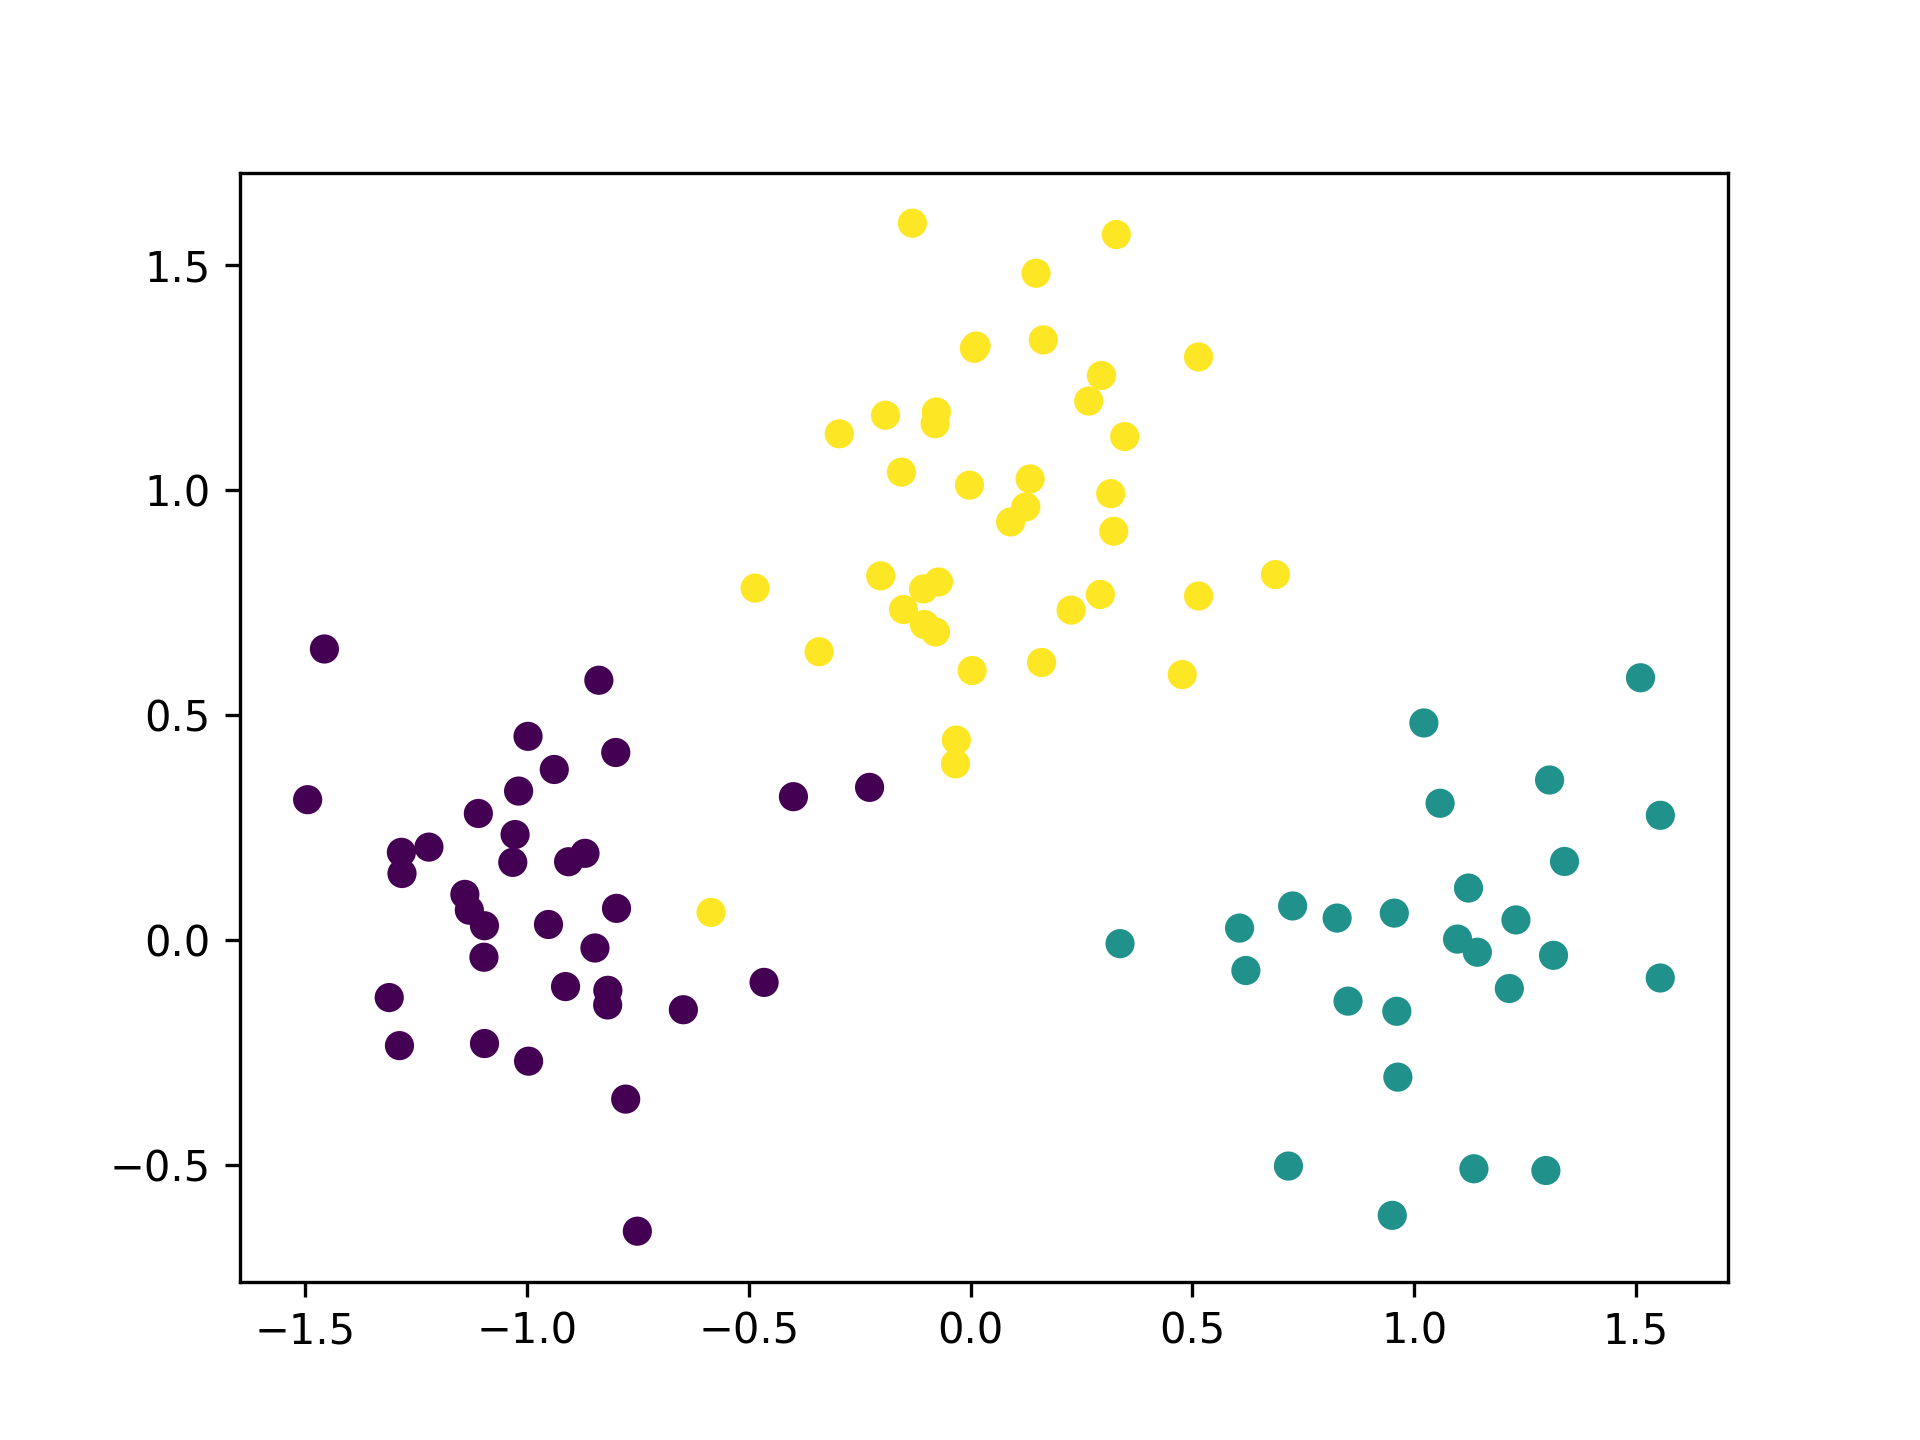

In [5]:
plt.scatter(Z[:, 0], Z[:, 1],c=params['c'])

<IPython.core.display.Javascript object>


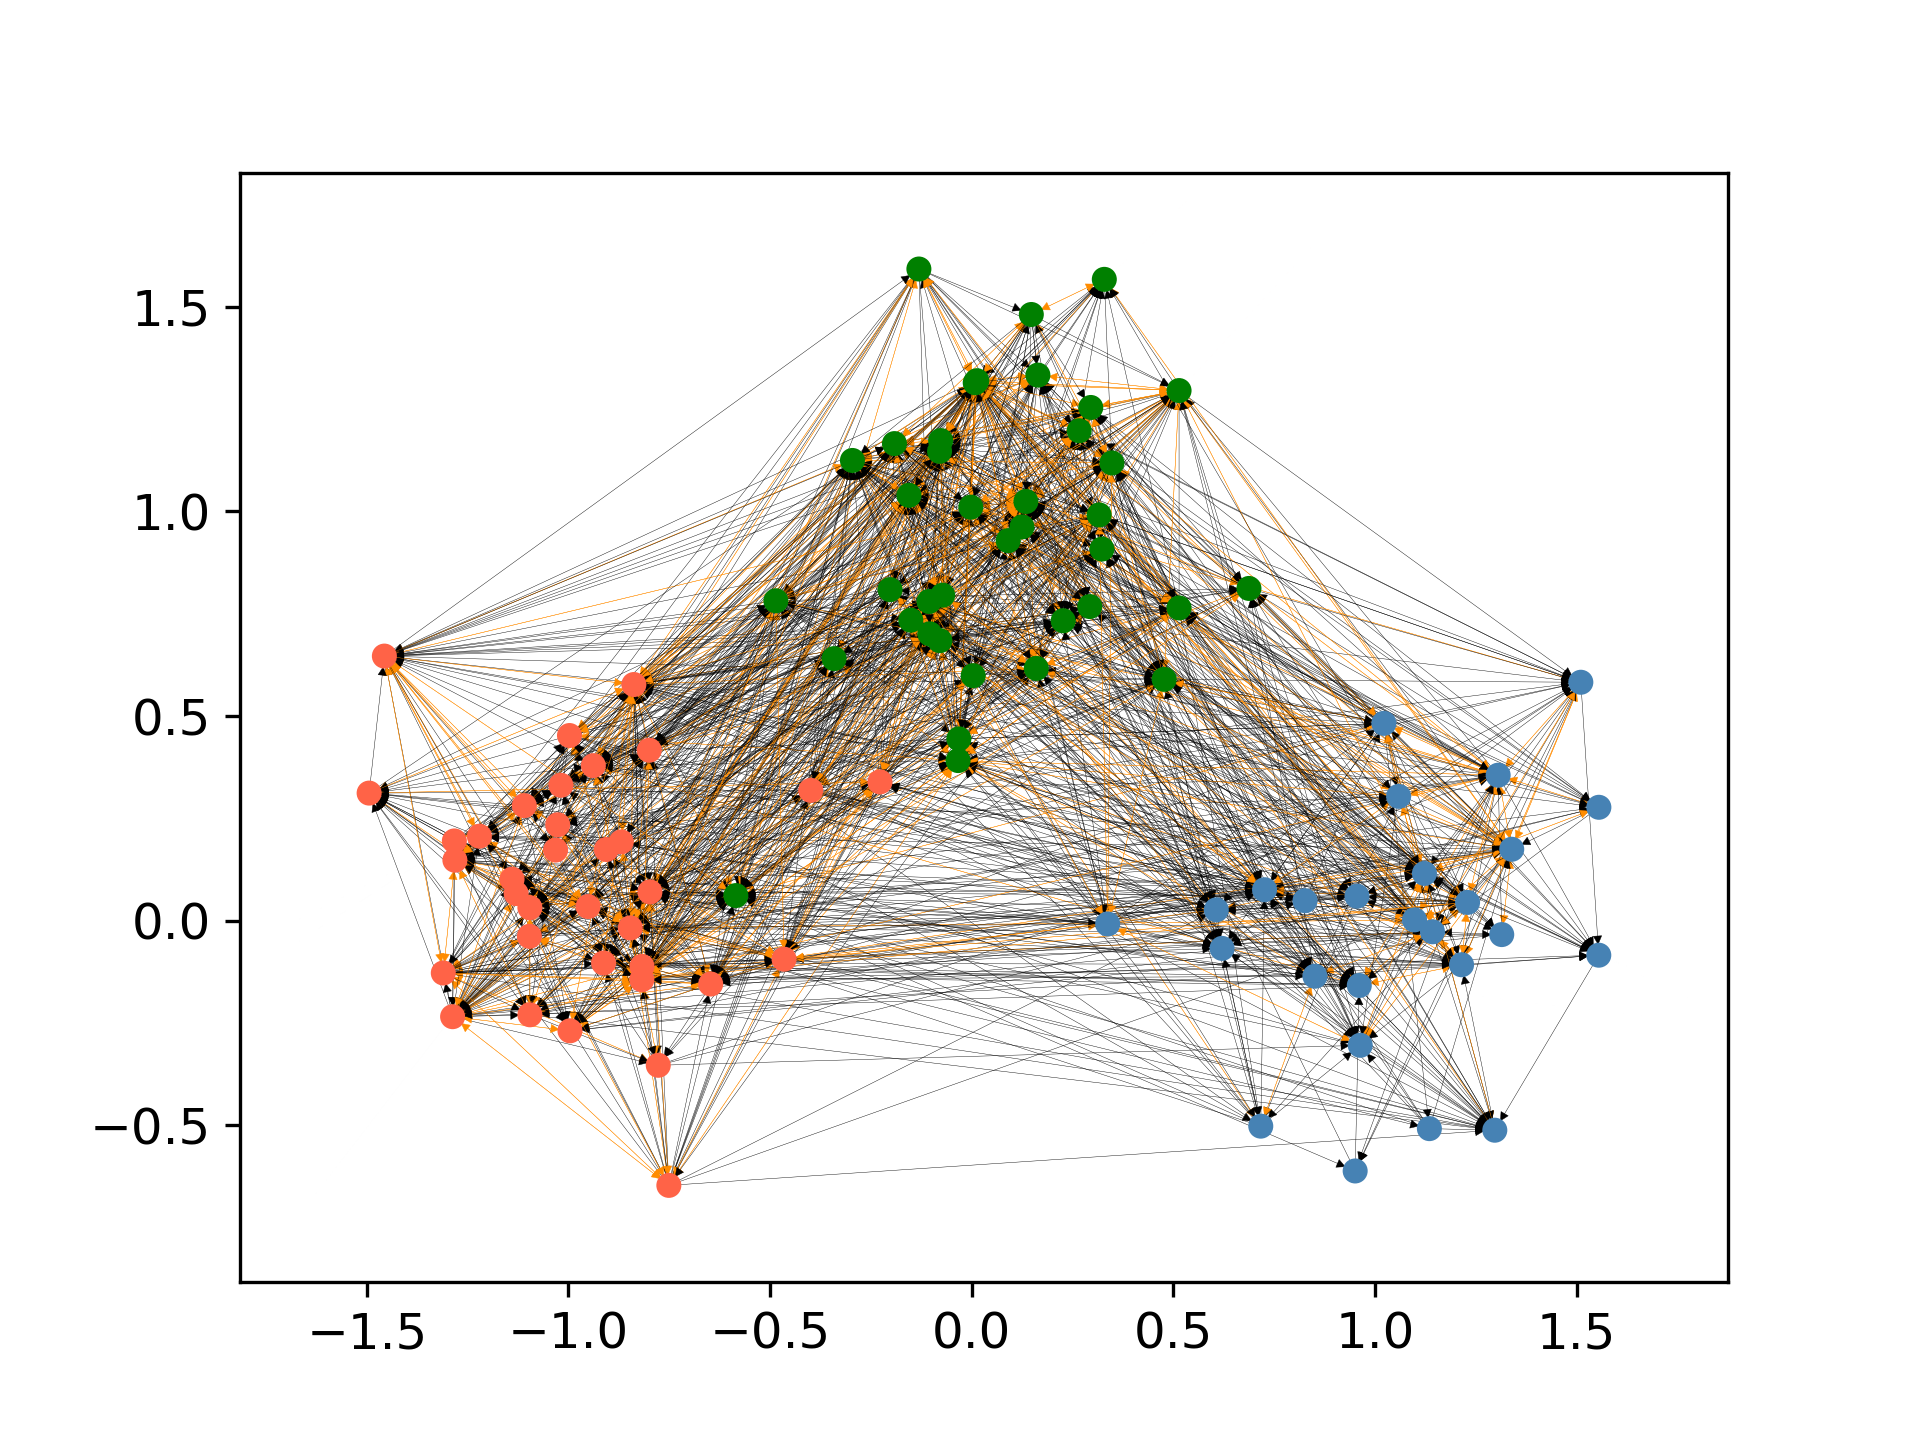

In [84]:
import networkx as nx

colors = np.asarray(["tomato", "steelblue", "green"])
#colors = np.asarray(["red", "cyan", "purple", "yellow","pink", 'orange'])
g = nx.from_numpy_array(Y, create_using=nx.DiGraph)
elist = list(nx.to_edgelist(g))
ecolor = ['darkorange' if Y[e[1], e[0]] else 'black' for e in elist]
pos = {k : Z[k] for k in range(Y.shape[0])}
nx.draw_networkx(g, pos, 
                 arrowsize=5,
                 node_color=colors[params['c']],
                 edge_color=ecolor, width=0.1, with_labels=False,
                 node_size=25)
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True,
                labelsize=12)

In [25]:
model = ReciprocityLSM(n_features=2, reciprocity_type='distance', random_state=42)
model.sample(Y, X_dyad=X_dyad, n_warmup=2000, n_samples=2000)

warmup:   0%|▏                                                | 20/4000 [00:07<24:31,  2.70it/s, 3 steps of size 3.48e-03. acc. prob=0.67]


KeyboardInterrupt: 

In [22]:
model.print_summary()

AUC: 0.889, AIC: 7132.901, BIC:  9761.787, DIC: 6795.824, WAIC: 6918.567

                  mean       std    median      2.5%     97.5%     n_eff     r_hat
beta_dyad[0]     -0.98      0.04     -0.98     -1.06     -0.91   1566.54      1.00
beta_dyad[1]      1.00      0.04      1.00      0.92      1.07   1502.48      1.00
   dist_coef      0.85      0.17      0.86      0.51      1.18    501.31      1.00
       r_var      0.87      0.15      0.86      0.61      1.15    411.97      1.00
  recip_coef     -0.69      0.29     -0.68     -1.30     -0.17    520.33      1.00
       s_var      0.85      0.15      0.83      0.60      1.17    248.56      1.00
     sr_corr      0.43      0.13      0.42      0.19      0.69    153.76      1.01
       z_var      0.77      0.15      0.77      0.49      1.07    309.74      1.00

Number of divergences: 13


In [23]:
print(params['recip_coef'], params['dist_coef'])

-0.4437089071569189 0.7593758640044623


<IPython.core.display.Javascript object>


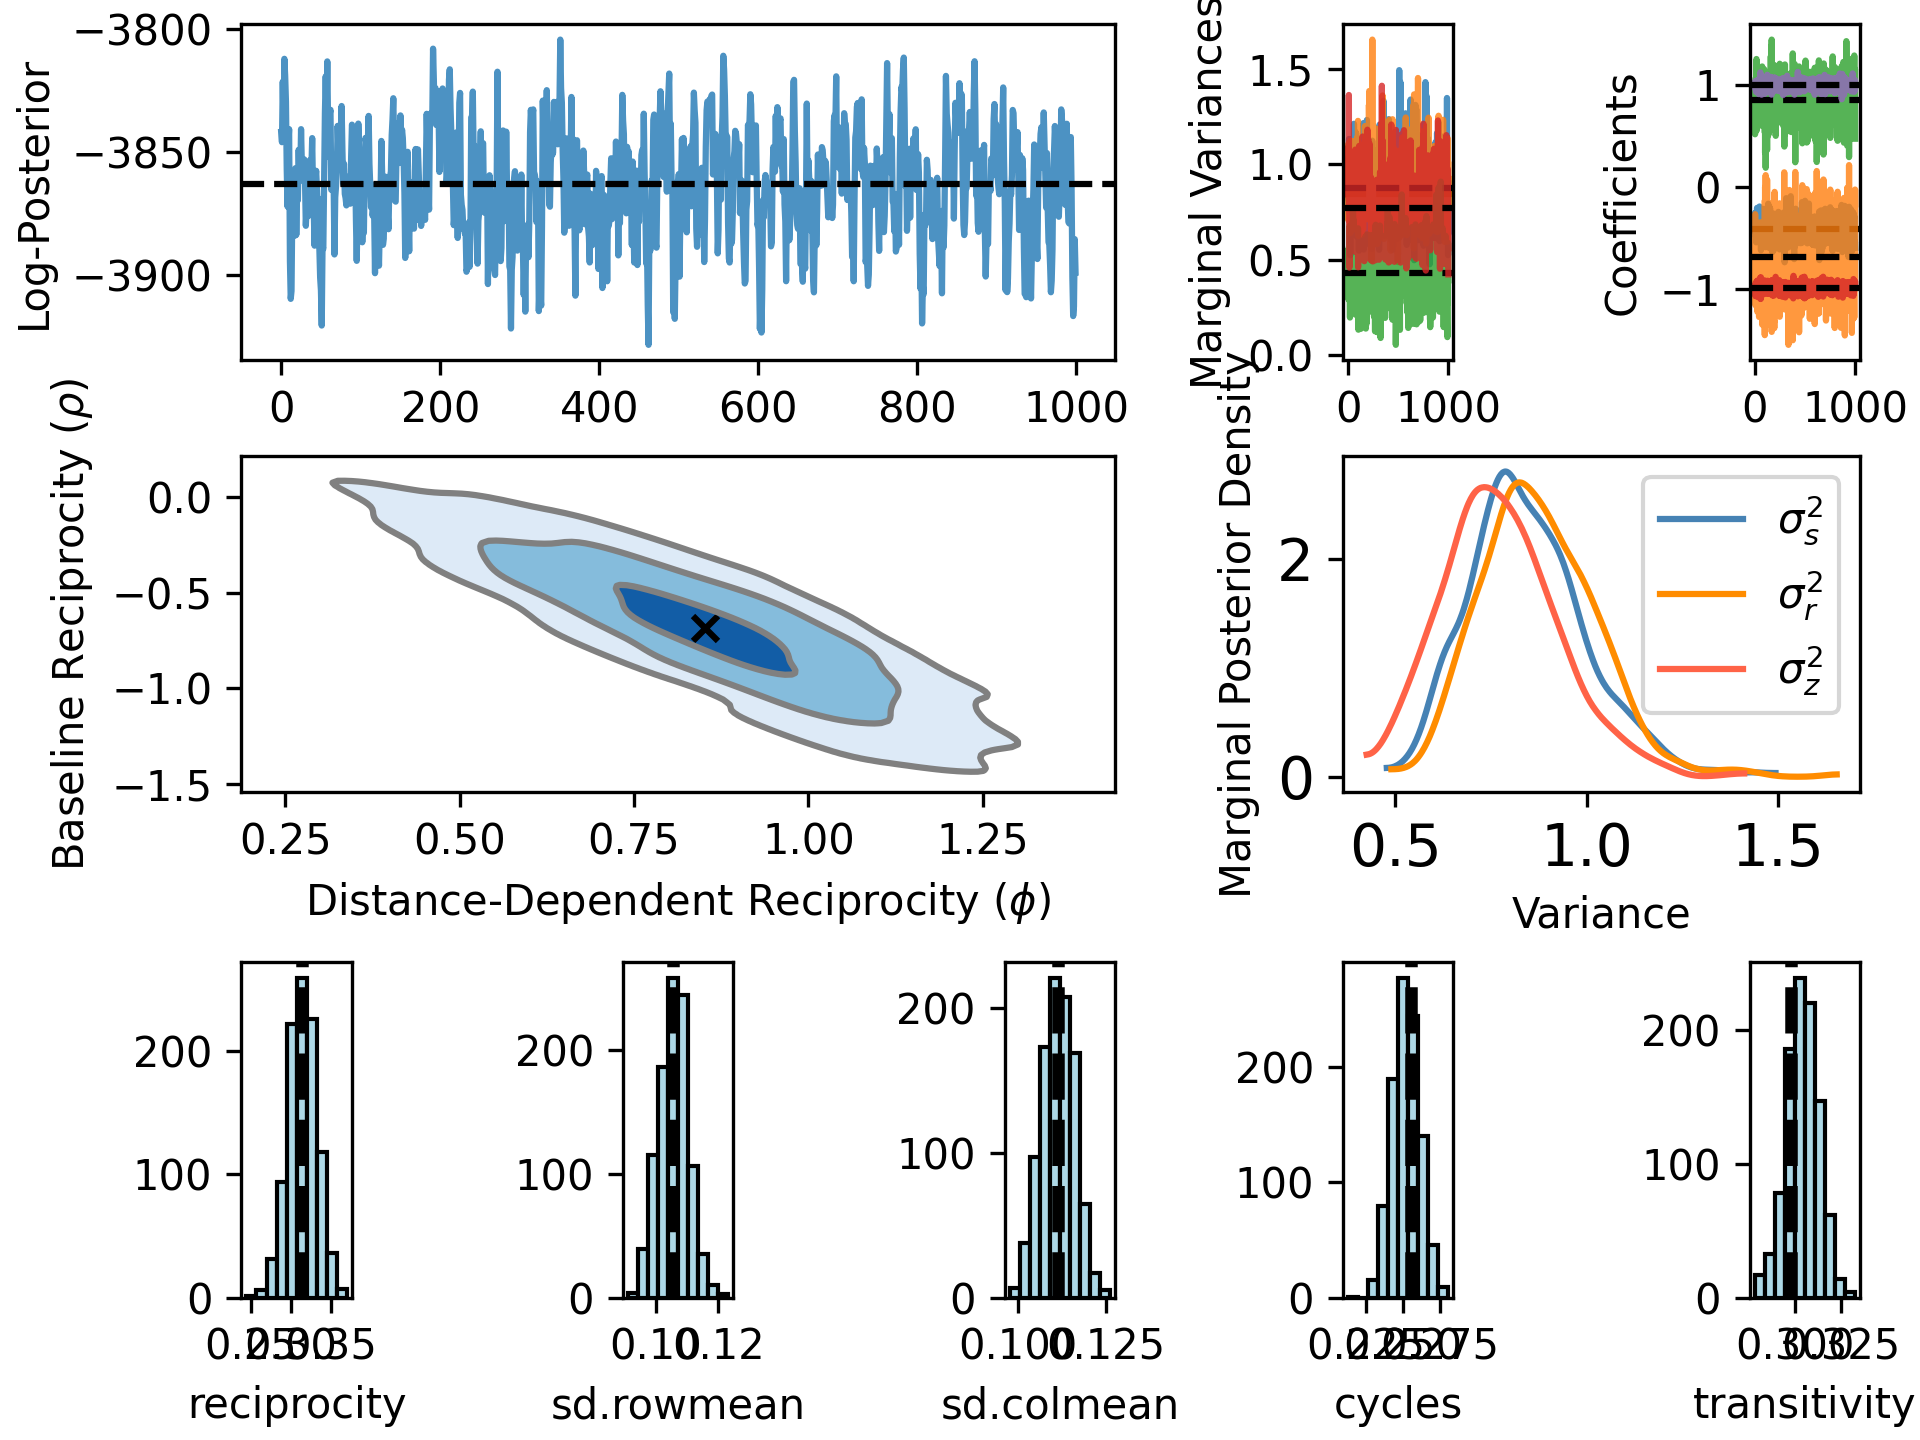

{'A': <Axes: label='A', ylabel='Log-Posterior'>,
 'B': <Axes: label='B', ylabel='Marginal Variances'>,
 'C': <Axes: label='C', ylabel='Coefficients'>,
 'D': <Axes: label='D', xlabel='Distance-Dependent Reciprocity ($\\phi$)', ylabel='Baseline Reciprocity ($\\rho$)'>,
 'E': <Axes: label='E', xlabel='Variance', ylabel='Marginal Posterior Density'>,
 'F': <Axes: label='F', xlabel='reciprocity'>,
 'G': <Axes: label='G', xlabel='sd.rowmean'>,
 'H': <Axes: label='H', xlabel='sd.colmean'>,
 'I': <Axes: label='I', xlabel='cycles'>,
 'J': <Axes: label='J', xlabel='transitivity'>}

In [24]:
model.plot()

## MSE Latent Space

0.48962193857040176


<IPython.core.display.Javascript object>


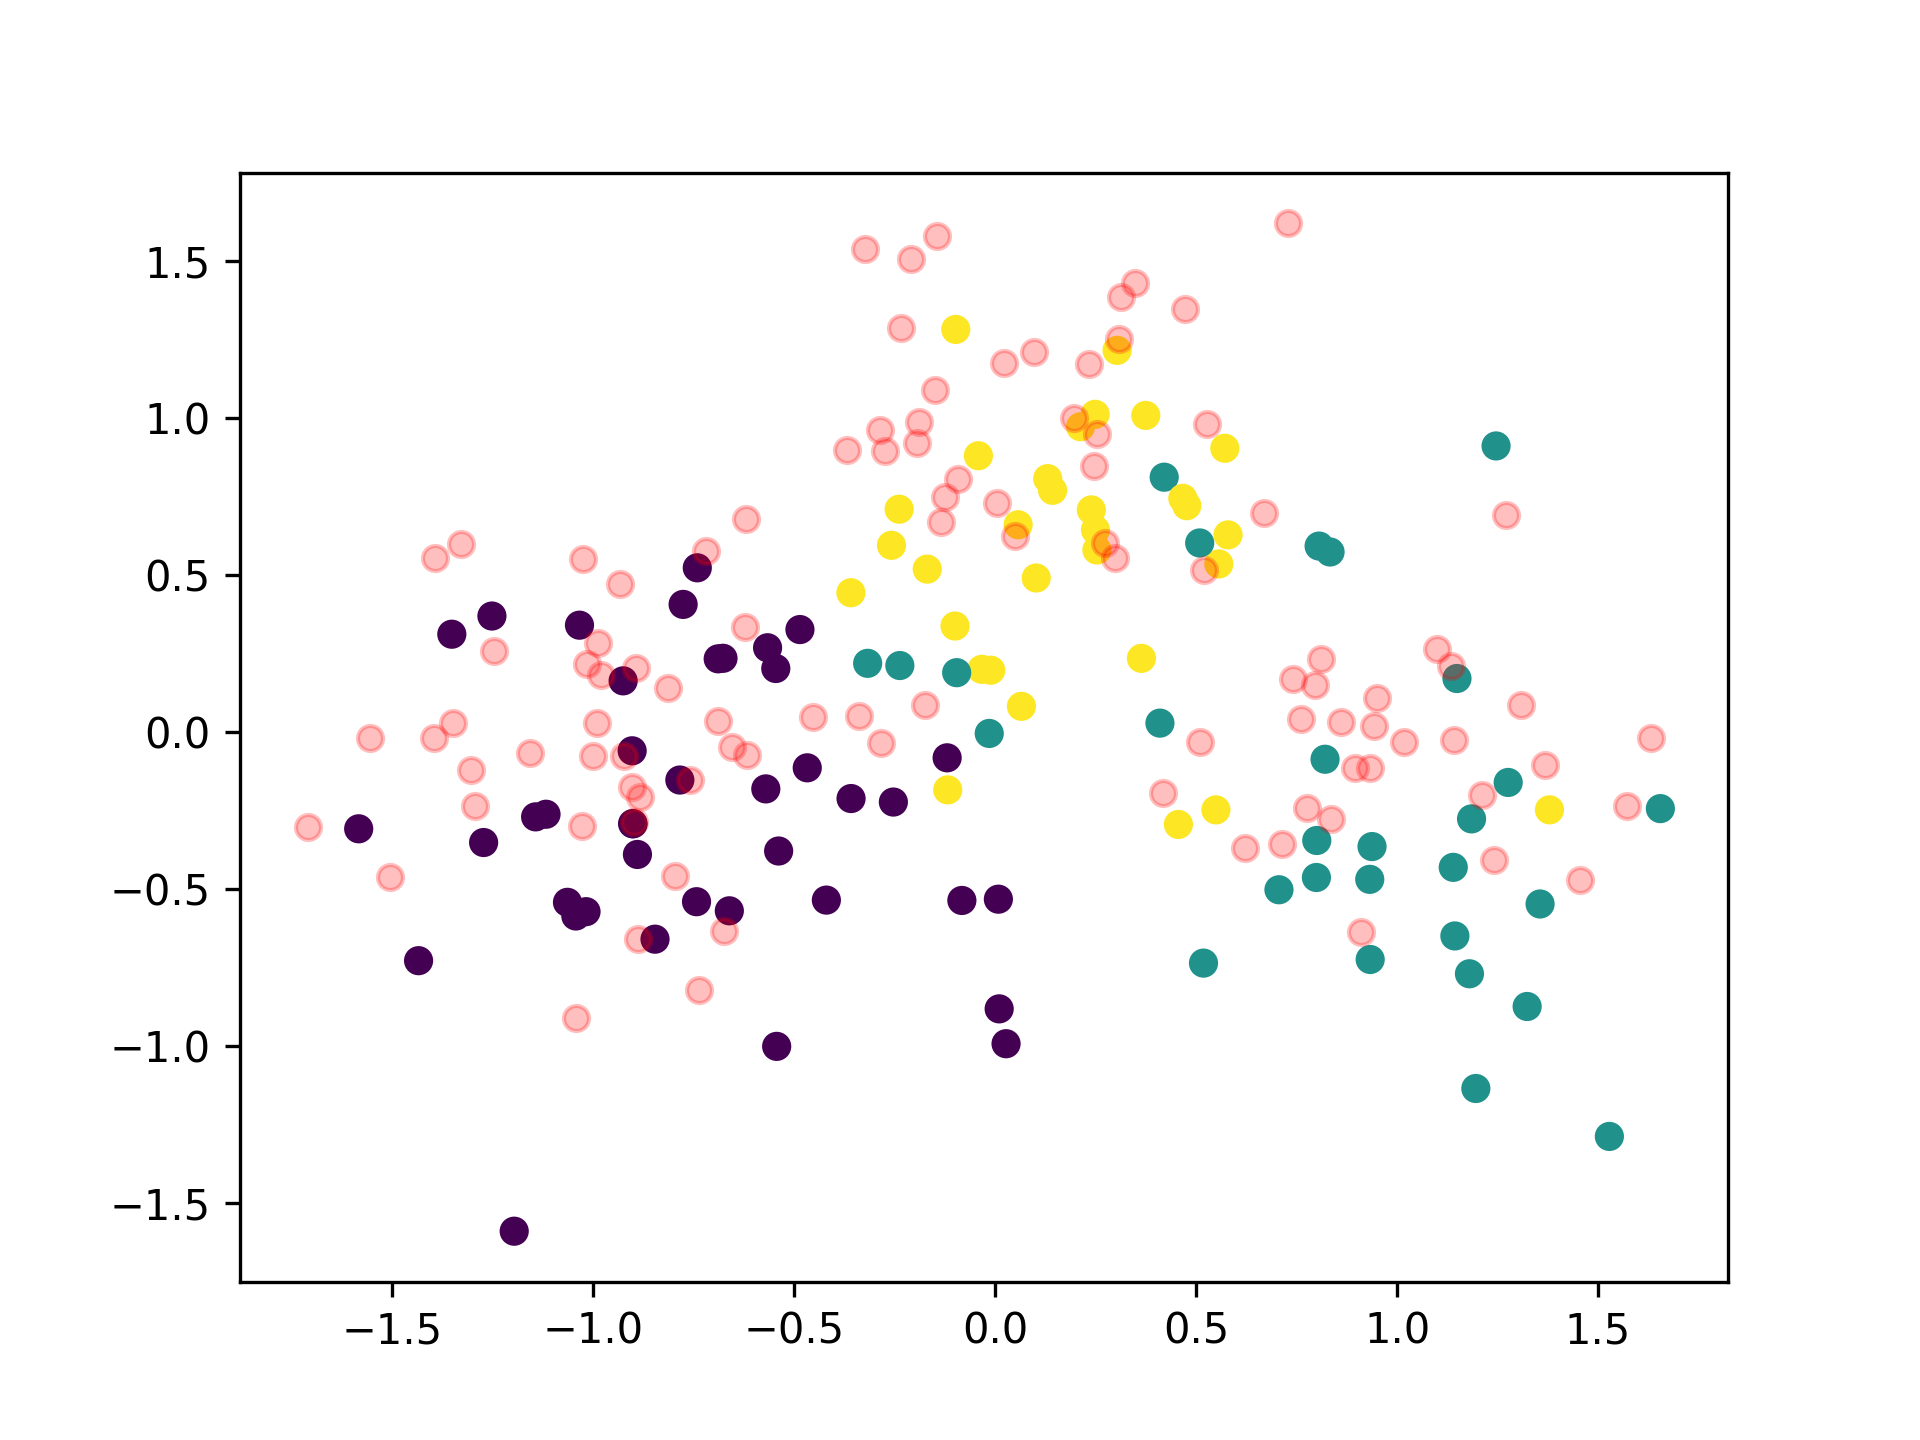

In [20]:
from scipy.linalg import orthogonal_procrustes

# MSE for latent position estimates
R, _ = orthogonal_procrustes(model.Z_, Z)
U_est = model.Z_ @ R
print(np.sqrt(np.mean((U_est - Z) ** 2)))

plt.scatter(U_est[:, 0], U_est[:, 1], c=params['c'])
plt.scatter(Z[:, 0], Z[:,1], alpha=0.25, c='red')

## MSE and PC (Sender Effects)

In [12]:
np.corrcoef(model.s_, params['s'].ravel())[0,1]

0.8985641067204343

In [13]:
np.mean((model.s_ - params['s'].ravel()) ** 2)

0.18032071268213876

## MSE and PC (reciever effects)

In [102]:
np.corrcoef(model.r_, params['r'].ravel())[0,1]

0.9165228979845695

In [103]:
np.mean((model.r_ - params['r'].ravel()) ** 2)

0.1453269901878183

## MSE for $\phi$ and $\rho$

In [104]:
np.abs(model.dist_coef_ - params['dist_coef'])

0.09843473628758725

In [105]:
np.abs(model.recip_coef_ - params['recip_coef'])

0.013245774890470408